In [10]:
import pandas as pd
from bids import BIDSLayout
import seaborn as sns

In [15]:
layout = BIDSLayout('../../', validate=False)

In [16]:
events = layout.get(suffix='events', extension='tsv')

In [19]:
events_collector = []
for events_obj in events:
    participant_id = events_obj.entities['subject']
    
    events_df = pd.read_csv(events_obj.path, sep='\t')
    
    participant_column = [participant_id] * len(events_df)
    events_df['participant_id'] = participant_column
    events_collector.append(events_df)

behavior_df = pd.concat(events_collector)

In [21]:
behavior_df.head()

,trial_type,switch,onset,correct,response_time,stimulus,block,duration,color,participant_id
0,single,0,38.055,1,1.697,1,1,1.5,blue,GE120001
1,single,0,44.068,1,0.674,8,1,1.5,blue,GE120001
2,single,0,48.578,1,1.177,9,1,1.5,blue,GE120001
3,single,0,54.090,1,0.461,3,1,1.5,blue,GE120001
4,single,0,57.096,1,0.647,1,1,1.5,blue,GE120001


In [44]:
# drop participants with more than 90% incorrect trials
group_df = behavior_df.groupby('participant_id')['correct'].describe()
bad_participants = list(group_df[group_df['mean'] < 0.1].index)

good_behavior_df = behavior_df[~behavior_df['participant_id'].isin(bad_participants)]

In [57]:
# number of participants
len(good_behavior_df['participant_id'].unique())

58

In [56]:
# get overall summary of data
# accuracy
print("ACCURACY")
display(good_behavior_df.groupby(['trial_type']).describe().T.loc['correct',:])

# reaction time (for correct trials)
print("REACTION TIME (correct trials)")
display(good_behavior_df.query("correct == 1").groupby(['trial_type']).describe().T.loc['response_time',:])

ACCURACY


trial_type,firsttrial,repeat,single,switch
count,348.000000,5568.000000,6960.000000,4524.000000
mean,0.655172,0.890086,0.920977,0.838638
std,0.475996,0.312810,0.269794,0.367905
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


REACTION TIME (correct trials)


trial_type,firsttrial,repeat,single,switch
count,228.000000,4956.000000,6410.000000,3794.000000
mean,1.224228,1.011540,0.791777,1.108341
std,0.345224,0.278116,0.225259,0.288620
min,0.679000,0.479000,0.371000,0.472000
25%,0.968000,0.805000,0.644000,0.889000
50%,1.176000,0.959000,0.742000,1.078000
75%,1.431000,1.163000,0.879000,1.285000
max,2.181000,2.254000,2.304000,2.257000


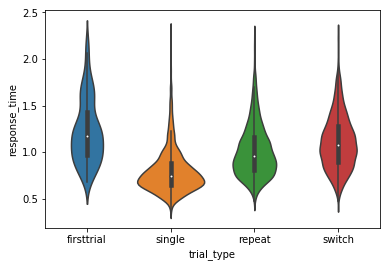

In [51]:
sns.violinplot(x='trial_type', y='response_time',
               order=['firsttrial', 'single', 'repeat', 'switch'],
               data=good_behavior_df.query("correct==1"))

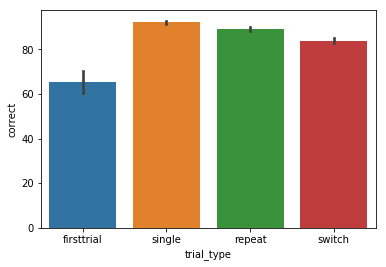

In [53]:
sns.barplot(x='trial_type', y='correct', data=good_behavior_df,
            order=['firsttrial', 'single', 'repeat', 'switch'],
            estimator=lambda x: sum(x==1)*100.0/len(x))